<a href="https://colab.research.google.com/github/kavita2776/pytorch1/blob/main/objectD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# download yolov4 model weights to data folder
!wget https://pjreddie.com/media/files/yolov3.weights

--2022-10-12 13:24:41--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  45.5MB/s    in 5.5s    

2022-10-12 13:24:46 (42.7 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
net = cv2.dnn.readNet("/content/yolov3.weights", "/content/yolov3.cfg[1].txt")
classes = []
with open("/content/coco.names.txt", "r") as f:
  classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255 ,size=(len(classes), 3))


In [4]:
img = cv2.imread("/content/room.imagesjpg.jpeg")
img = cv2.resize(img, None, fx=0.8, fy=0.7)
height, width, channels = img.shape

blob = cv2.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

[2 0 6 1]


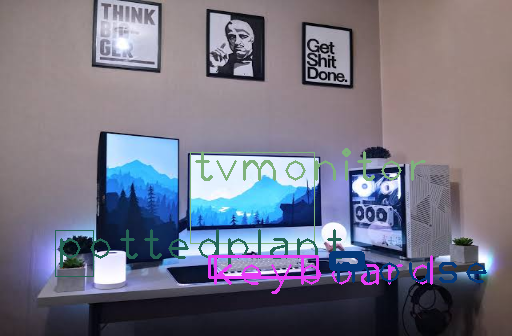

In [5]:
#Showing informations on the screen
class_ids=[]
confidences=[]
boxes=[]
for out in outs:
    for detection in out:
        scores=detection[5:]
        class_id=np.argmax(scores)
        confidence=scores[class_id]
        if confidence>0.5:
            #Object detected
            center_x=int(detection[0]*width)
            center_y=int(detection[1]*height)
            w=int(detection[2]*width)
            h=int(detection[3]*height)

            #Rectangle coordinates
            x=int(center_x-w/2)
            y=int(center_y-h/2)

            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
print(indexes)
font=cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h=boxes[i]
        label=str(classes[class_ids[i]])
        color=colors[i]
        cv2.rectangle(img,(x,y),(x+w,y+h),color,i)
        cv2.putText(img,label,(x,y+30),font,3,color,2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()